# PROJECT ON HEART DISEASE PREDICTION

**First step is to import all libraries**

Step 1: Import all libraries that are used in the model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [6]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 2: Import the data that is used for the model prediction

In [8]:
df=pd.read_csv('Downloads/HeartDisease.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/HeartDisease.csv'

**Explore the data to check the no of variables and no of records in the table**

In [5]:
df.shape

(303, 14)

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


**Check the Missing Values**

In [8]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

Step 3:Consider each variable and check for the acceptance or rejection of the variable in the model

**Considering age**

In [9]:
df.age.value_counts().sum()

303

In [10]:
from scipy.stats import ttest_ind
ttest_ind(a=df['age'],b=df['target'],equal_var=False)

Ttest_indResult(statistic=103.00041313916304, pvalue=2.4882745359625946e-238)

After performing Independent t-test,we conclude the 'Age' variable is less than the level of significance, It is a good predictor in the model

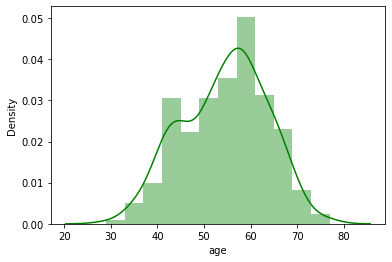

In [11]:
sns.distplot(df.age,color='green')
plt.xlabel('age')
plt.show()

**Considering Chest pain**

In [12]:
df.chest_pain.value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

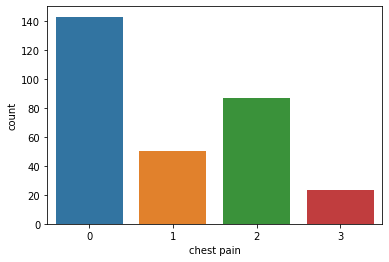

In [13]:
sns.countplot(df.chest_pain)
plt.xlabel('chest pain')
plt.show()

In [14]:
from scipy.stats import ttest_ind
ttest_ind(a=df['chest_pain'],b=df['target'],equal_var=False)

Ttest_indResult(statistic=6.414992917860379, pvalue=3.6743127652477344e-10)

**Considering cholestrol**

In [15]:
df.cholestrol.value_counts()

204    6
197    6
234    6
269    5
212    5
      ..
215    1
210    1
200    1
195    1
417    1
Name: cholestrol, Length: 152, dtype: int64

In [16]:
from scipy.stats import ttest_ind
ttest_ind(a=df['target'],b=df['cholestrol'],equal_var=False)

Ttest_indResult(statistic=-82.51887021442299, pvalue=3.0221356802963283e-209)

After performing Independent t-test,we conclude the 'cholestrol' variable is less than the level of significance, It is a good predictor in the model

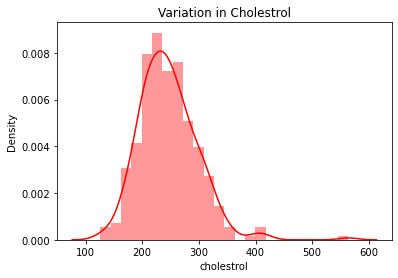

In [17]:
sns.distplot(df.cholestrol,color='red')
plt.title('Variation in Cholestrol')
plt.xlabel('cholestrol')
plt.show()

**Considering gender**

In [18]:
df.gender.value_counts()

1    207
0     96
Name: gender, dtype: int64

As the dependent variable 'gender' is categorical and response variable is also categorical, 
we need to perform Chisquare test

In [19]:
cross1=pd.crosstab(index=df['target'],columns=df['gender'])
cross1

gender,0,1
target,,
0,24,114
1,72,93


In [20]:
from scipy.stats import chi2_contingency
result=chi2_contingency(cross1)
print(result[1])


1.8767776216941532e-06


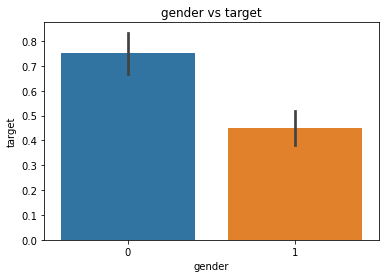

In [29]:
sns.barplot(x='gender',y='target',data=df)
plt.title('gender vs target')
plt.show()

After the test, as the 'gender' variable pvalue is more than the level of significance i.e.,(> 0.05), it is not a good predictor

**Considering rest_ecg**

In [22]:
df.rest_ecg.value_counts()

1    152
0    147
2      4
Name: rest_ecg, dtype: int64

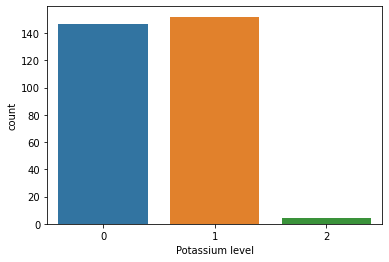

In [31]:
sns.countplot(x='rest_ecg',data=df)
plt.xlabel('Potassium level')
plt.show()

In [24]:
ttest_ind(a=df['rest_ecg'],b=df['target'],equal_var=False)

Ttest_indResult(statistic=-0.39629477489938897, pvalue=0.6920279315601168)

After the result, the dependent variable 'rest_ecg' is more than the level of significance i.e.,(>0.05), it is not a good predictor

**Considering old_peak**

In [37]:
df.old_peak.value_counts().sum()

303

In [33]:
ttest_ind(a=df['old_peak'],b=df['target'],equal_var=False)

Ttest_indResult(statistic=6.819096267644434, pvalue=3.295956560728633e-11)

After the result, the dependent variable 'old_peak' is less the level of significance i.e.,(<0.05), it is a good predictor

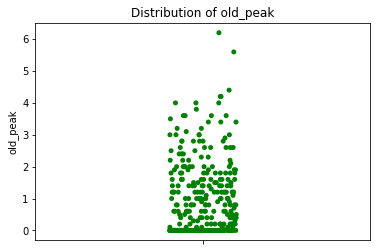

In [41]:
sns.stripplot(y=df.old_peak,color='green')
plt.title('Distribution of old_peak')
plt.show()


**Considering slope**

In [42]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [43]:
ttest_ind(a=df['slope'],b=df['target'],equal_var=False)

Ttest_indResult(statistic=18.767280595770796, pvalue=9.740613612317738e-62)

After the result, the dependent variable 'slope' is less the level of significance i.e.,(<0.05), it is a good predictor

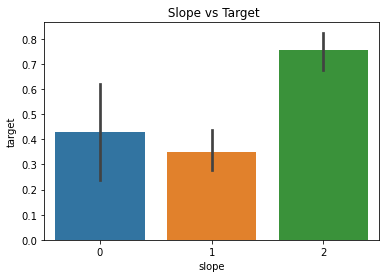

In [47]:
sns.barplot(x='slope',y='target',data=df)
plt.title(' Slope vs Target')
plt.show()

**Considering exer_angina**

In [48]:
df.exer_angina.value_counts()

0    204
1     99
Name: exer_angina, dtype: int64

In [49]:
cross2=pd.crosstab(index=df['target'],columns=df['exer_angina'])
cross2

exer_angina,0,1
target,,
0,62,76
1,142,23


In [51]:
result1=chi2_contingency(cross2)
print(result1[1])

7.454409331235655e-14


In [53]:
new_df=df[['age','gender','chest_pain','cholestrol','exer_angina','old_peak','slope','target']]
new_df

,age,gender,chest_pain,cholestrol,exer_angina,old_peak,slope,target
0,63,1,3,233,0,2.3,0,1
1,37,1,2,250,0,3.5,0,1
2,41,0,1,204,0,1.4,2,1
3,56,1,1,236,0,0.8,2,1
4,57,0,0,354,1,0.6,2,1
...,...,...,...,...,...,...,...,...
298,57,0,0,241,1,0.2,1,0
299,45,1,3,264,0,1.2,1,0
300,68,1,0,193,0,3.4,1,0
301,57,1,0,131,1,1.2,1,0


In [54]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
mylogit = smf.glm(formula='target~age+gender+chest_pain+cholestrol+exer_angina+old_peak+slope', data=new_df, family=sm.families.Binomial())
res = mylogit.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  303
Model:                            GLM   Df Residuals:                      295
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -125.91
Date:                Sat, 07 Aug 2021   Deviance:                       251.82
Time:                        21:20:58   Pearson chi2:                     278.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.7848      1.474      3.245      

In [55]:
X=new_df.drop(['target'],axis=1)
X

,age,gender,chest_pain,cholestrol,exer_angina,old_peak,slope
0,63,1,3,233,0,2.3,0
1,37,1,2,250,0,3.5,0
2,41,0,1,204,0,1.4,2
3,56,1,1,236,0,0.8,2
4,57,0,0,354,1,0.6,2
...,...,...,...,...,...,...,...
298,57,0,0,241,1,0.2,1
299,45,1,3,264,0,1.2,1
300,68,1,0,193,0,3.4,1
301,57,1,0,131,1,1.2,1


In [56]:
Y=new_df['target']


In [57]:
ypredict=res.predict(X)
ypredict

0      0.465975
1      0.351971
2      0.946304
3      0.618319
4      0.492171
         ...   
298    0.542276
299    0.875863
300    0.039265
301    0.122688
302    0.912438
Length: 303, dtype: float64

In [58]:
ypredict_binomial = [0 if X < 0.5 else 1 for X in ypredict]
# Classification report
print(classification_report(Y,ypredict_binomial))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       138
           1       0.82      0.82      0.82       165

    accuracy                           0.80       303
   macro avg       0.80      0.80      0.80       303
weighted avg       0.80      0.80      0.80       303



In [59]:
fpr, tpr, thresholds =roc_curve(Y, ypredict)
roc_auc = auc(fpr, tpr) 
print(roc_auc)

0.8876152832674572


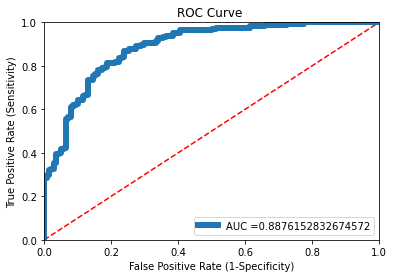

In [60]:
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw=6)
plt.legend(loc=4) #Location of label
plt.show()